In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dự đoán pass / fail dựa trên giờ học

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [ ]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X

array([[0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [ ]:
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [ ]:
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [ ]:
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)

In [ ]:
print(w[-1])


[[-4.10772938]
 [ 1.58194784]]


 => y = sigmoid(-4.1 + 1.55*x)

In [ ]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03570394 0.05213457 0.07553417 0.10823694 0.1527589  0.21125598
  0.21125598 0.28462833 0.37148188 0.46751792 0.56602263 0.65957367
  0.74214518 0.81044456 0.90416708 0.93340198 0.9541705  0.9686797
  0.97869797 0.99023296]]


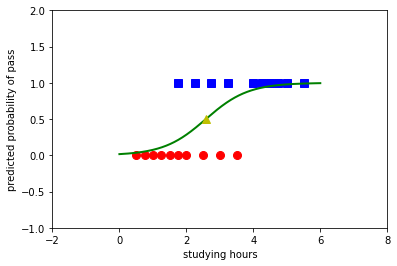

In [ ]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

=> có thể thấy nếu học từ 4 tiếng trở lên thì khả năng đậu cao hơn, còn học dưới 2 tiếng thì khả năng rớt cao hơn

Exercise : Dự đoán cho vay 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')

In [ ]:
data.shape

(20, 3)

In [ ]:
data

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [ ]:
data = data.values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

Text(0, 0.5, 'kinh nghiệm (năm)')

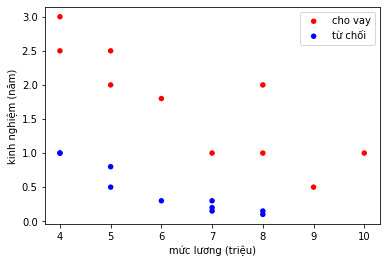

In [ ]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [ ]:
X = np.hstack((np.ones((N, 1)), x))

In [ ]:
w = np.array([0.,0.1,0.1]).reshape(-1,1)

In [ ]:
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01

for i in range(1, numOfIteration):
    
	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(X, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(X.T, y_predict-y)	 
    print(cost[i])

[14.3783222]
[14.37536009]
[14.52617153]
[14.51426849]
[14.61633124]
[14.45526156]
[14.40335079]
[14.14832828]
[13.97986699]
[13.71835467]
[13.48635327]
[13.25428121]
[12.99278425]
[12.79528802]
[12.52560943]
[12.35759173]
[12.09391963]
[11.94844506]
[11.70025271]
[11.57135333]
[11.34455593]
[11.22796382]
[11.02570355]
[10.91881102]
[10.74211332]
[10.64364326]
[10.49198407]
[10.40156765]
[10.27334863]
[10.19110203]
[10.08403294]
[10.01018498]
[9.92158252]
[9.85619039]
[9.78321018]
[9.72599049]
[9.66581037]
[9.61609685]
[9.56606508]
[9.52287899]
[9.48063066]
[9.44282419]
[9.40636077]
[9.37277831]
[9.34050283]
[9.31011155]
[9.28081799]
[9.252781]
[9.22560668]
[9.19929876]
[9.1736558]
[9.14863912]
[9.12414184]
[9.10012349]
[9.07652441]
[9.05331276]
[9.03045303]
[9.007922]
[8.98569682]
[8.96376049]
[8.94209698]
[8.92069328]
[8.8995372]
[8.87861825]
[8.85792654]
[8.83745323]
[8.81718992]
[8.79712892]
[8.77726292]
[8.7575851]
[8.73808899]
[8.71876849]
[8.69961781]
[8.68063146]
[8.66180423]
[

In [ ]:
# thuc te
logistics regression predict = 0-1
>=.5 predict 1
<.5 predict 0

health
>=.9 predict ung thu 
<.1 predict ko bi ung thu
.1 - .9 khoang nghi ngo: bac si tu van 

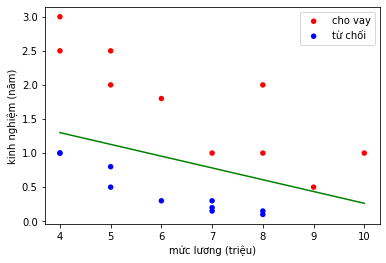

In [ ]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

Diabetes Data 

Download file here https://1drv.ms/x/s!AtqQEFO2GBQugrpYAopWbLKUru5BhA?e=xJozLN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pima = pd.read_csv('/content/drive/MyDrive/MINDX-DA20/Lesson3 - Logistic Regression/diabetes.csv')

In [ ]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']


In [ ]:
X = pima[feature_cols] # Features


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

In [ ]:
scaler

StandardScaler()

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
X_scaled

array([[ 0.63994726, -0.69289057,  0.20401277, ...,  0.84832379,
         0.14964075,  0.46849198],
       [-0.84488505, -0.69289057, -0.68442195, ..., -1.12339636,
        -0.16054575, -0.36506078],
       [ 1.23388019, -0.69289057, -1.10325546, ...,  1.94372388,
        -0.26394125,  0.60439732],
       ...,
       [ 0.3429808 ,  0.27959377, -0.73518964, ...,  0.00330087,
         0.14964075, -0.68519336],
       [-0.84488505, -0.69289057, -0.24020459, ...,  0.1597866 ,
        -0.47073225, -0.37110101],
       [-0.84488505, -0.69289057, -0.20212881, ..., -0.8730192 ,
         0.04624525, -0.47378505]])

In [ ]:
y = pima.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [ ]:
lr = logreg.fit(X_train,y_train)

In [ ]:
y_pred=logreg.predict(X_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [ ]:
lr.score(X_test, y_test)

0.8020833333333334

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

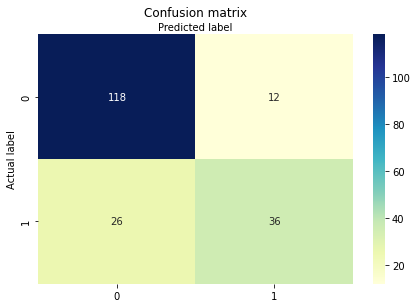

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
(118+36)/(118+36+26+12)

0.8020833333333334

In [ ]:
precision = 36/(36+12)
precision

0.75

In [ ]:
recall = 36/(36+26)
recall

0.5806451612903226

Precesion = TP/(TP+FP)
Trong tổng số dự đoán cho vay thì có bao dự đoán cho vay là chính xác: model luôn cho ra dự đoán chính xác cao, cực kì chắc chắn mới dự đoán 



Recall = TP/(TP + FN)
Trong tổng số thực tế được cho vay thì có bao dự đoán là chính xác: model sẽ cố gắng ko bị miss case nào cần cho vay
chỉ cần có tia hi vọng là đúng thì cũng phải cho kết quả đúng
Thực tế thì nó gần gần như cái vụ bác sĩ dự báo ung thư




In [ ]:
Ví dụ khác: 
90% đơn hàng nó đến từ HCM
10% đơn hàng nó đền từ HN

accuracy lúc đó 94%

accuracy optimize precision and recall là 92%

**PLA**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix 
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
dataset = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
dataset["Class"] = breast_cancer_dataset.target
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Class                      0
dtype: int64

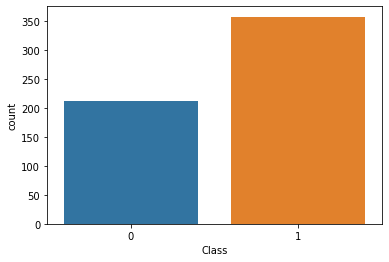

In [ ]:
sns.countplot(x = dataset["Class"])

In [ ]:
Y = dataset["Class"].values
X = dataset.iloc[:, :-1].values

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = np.column_stack((X,np.ones(X.shape[0])))
print("X shape:- ", X.shape)
print("Y shape:- ", Y.shape)

X shape:-  (569, 31)
Y shape:-  (569,)


In [ ]:
class PLA :
  def __init__(self, iteration , learning_rate):
    self.iterations = iteration
    self.learning_rate = learning_rate 
    self.weights = None
    
  def activation_function(self,X):
    return np.where(X>=0, 1, 0)

  def predict(self, X):
    output = np.dot(X,self.weights)
    prediction = self.activation_function(output)
    return prediction

  def fit(self, X, Y):
    self.m , self.n = X.shape
    self.weights = np.random.uniform(self.n)
    y_ = np.array([1 if i>0 else 0 for i in Y])
    #looping 
    for _ in range(self.iterations):
      for idx, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights)
        y_predicted = self.activation_function(linear_output)
                
        # Perceptron update rule
        update = self.learning_rate * (y_[idx] - y_predicted)
        self.weights += update * x_i

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=0)
model = PLA(1000, 0.001)
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
print("accuracy:- ",accuracy_score(y_test,y_pred))

accuracy:-  0.9707602339181286


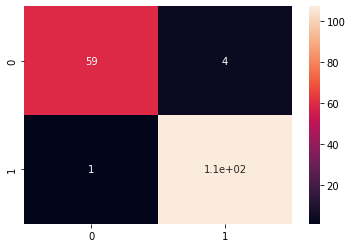

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot= True)

In [ ]:
#Using SKLEARN
from sklearn.linear_model import Perceptron
model_sklearn = Perceptron()
model_sklearn.fit(x_train, y_train)
y_pred_sklearn = model_sklearn.predict(x_test)
print("accuracy:- ",accuracy_score(y_test,y_pred_sklearn))
print("cross_val_score :-", cross_val_score(model_sklearn, X, Y, cv = 10, scoring = 'accuracy'))

accuracy:-  0.9590643274853801
cross_val_score :- [0.94736842 0.98245614 0.96491228 0.94736842 0.96491228 0.98245614
 0.9122807  1.         1.         0.91071429]


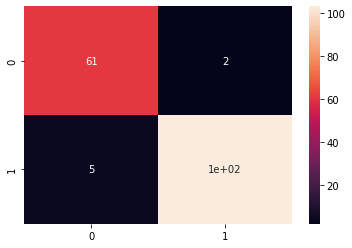

In [ ]:
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_sklearn, annot= True)

E+01 means moving the decimal point one digit to the right, E + 02 = hàng trăm. 

In [ ]:
#Example

In [ ]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr04.xls', engine='xlrd')
df

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


In [ ]:
df.corr()

,X,Y
X,1.000000,0.906265
Y,0.906265,1.000000


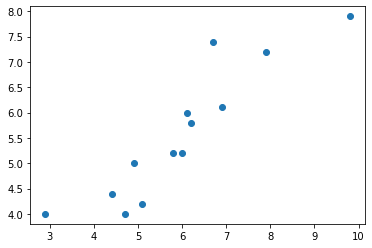

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.X,df.Y)

In [ ]:
df_ = df.query("X<35").copy()
df_.corr()

,X,Y
X,1.00000,0.35834
Y,0.35834,1.00000


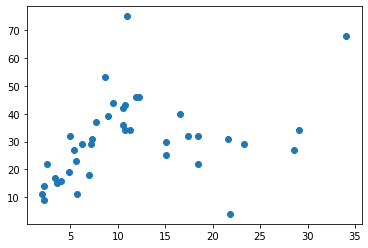

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_.X,df_.Y)

In [ ]:
#linear regression
y = ax + b
# logistics regression
probability_output = sigmoid(y)
transform result 0->1
if probability_output >= .5:
    predict 1
else:
    predict 0

In [ ]:
khao sat
te, binh thuong, tot

-1, 0, 1


# survey result
[te, te, binh thuong, tot]

[bac si, ki su, tiep vien]

# one hot encoding
te|binh thuong| tot
1    0           0
1    0           0 
0    1           0
0    0           1

# ordinal encoding
rating
-1
-1
0
1